In [1]:
install.packages("tibble")
library("tibble")
install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(dplyr)
library(repr)

package 'tibble' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daxel\AppData\Local\Temp\Rtmp6rNojd\downloaded_packages


Warning message:
"package 'tibble' was built under R version 3.6.3"

package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daxel\AppData\Local\Temp\Rtmp6rNojd\downloaded_packages


Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Niveau 1 : images satellites

# hastière

In [2]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,Débit,Précipitations
2017-04-03,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,7.188,92.46,4.6
2017-05-26,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,2.969,31.33,0.0


In [3]:
data = subset(data, select = -c(date,Débit,Précipitations,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5
53.5,174.5,354.5,231.5,204.0
294.0,228.5,305.0,193.5,150.5


Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



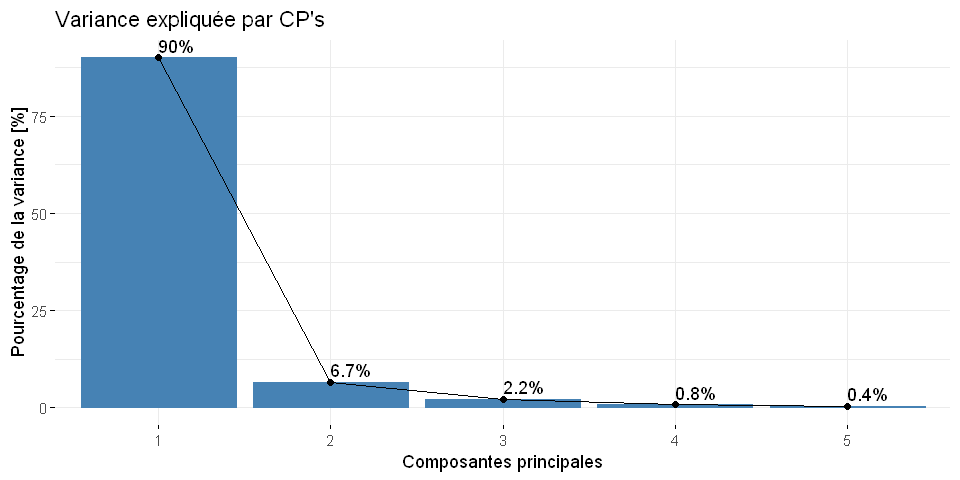

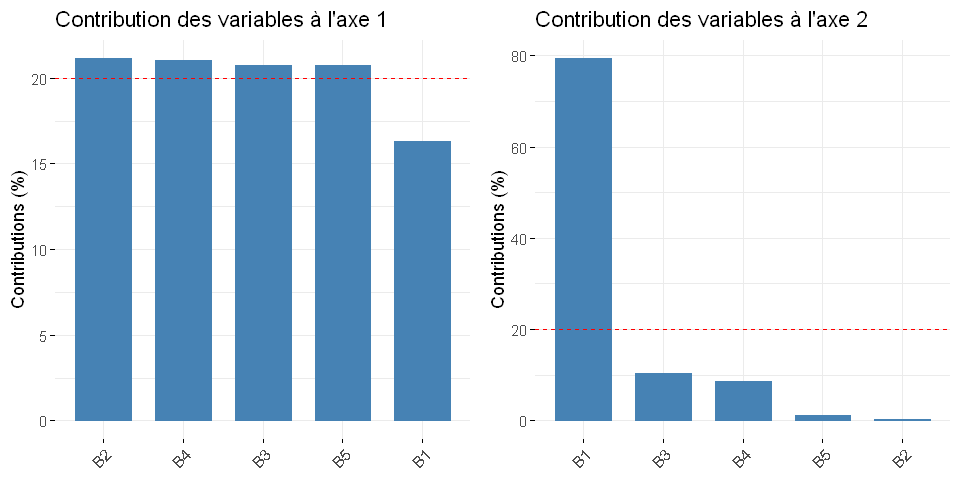

In [4]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 5, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 5, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, ncol=2)

In [5]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=5):
[1] 2.12 0.58 0.33 0.20 0.14

Rotation (n x k) = (5 x 5):
    PC1    PC2    PC3   PC4    PC5
B1 0.40  0.891 -0.022  0.20  0.033
B2 0.46 -0.064 -0.512 -0.64 -0.344
B3 0.46 -0.322 -0.417  0.36  0.619
B4 0.46 -0.294  0.241  0.51 -0.624
B5 0.46 -0.107  0.711 -0.41  0.328


# Andenne

In [6]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\i_SR.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité
2017-04-03,277.75,315.75,387.5,235.25,204.75,154.5,137.75,157.75,137.25,539.5,150.25,109.75,4.850
2017-05-06,79.50,116.00,116.5,13.00,1.00,1.0,1.00,1.00,1.00,111.5,62.50,82.50,5.088


In [7]:
data = subset(data, select = -c(MOY,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5
277.75,315.75,387.5,235.25,204.75
79.50,116.00,116.5,13.00,1.00


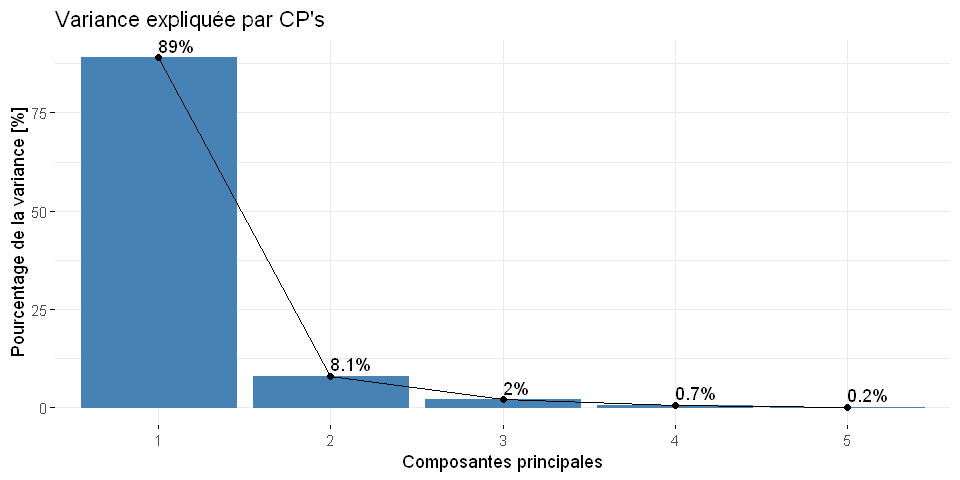

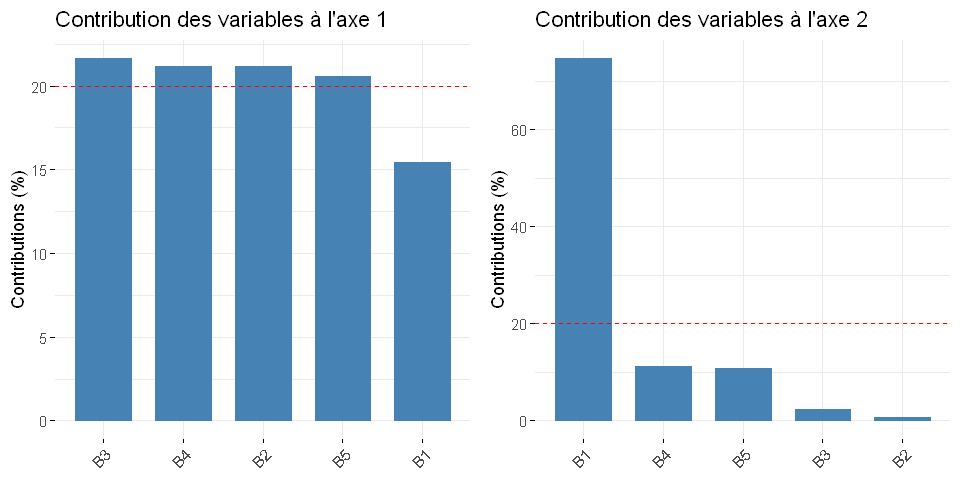

In [8]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 5, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 5, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, ncol=2)

In [9]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=5):
[1] 2.11 0.64 0.32 0.18 0.10

Rotation (n x k) = (5 x 5):
     PC1   PC2   PC3   PC4    PC5
B1 -0.39  0.86  0.30 -0.10 -0.027
B2 -0.46  0.08 -0.68  0.55 -0.152
B3 -0.47 -0.16 -0.33 -0.63  0.506
B4 -0.46 -0.34  0.21 -0.28 -0.743
B5 -0.45 -0.33  0.55  0.46  0.411


# Lixhe

In [10]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\i_SR.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
2017-04-26,0.681,208,265,281,174,132,66,73,78,66,1,114,112
2017-05-06,0.856,368,395,358,300,318,361,346,536,366,533,326,260


In [11]:
data = subset(data, select = -c(date,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5
208,265,281,174,132
368,395,358,300,318


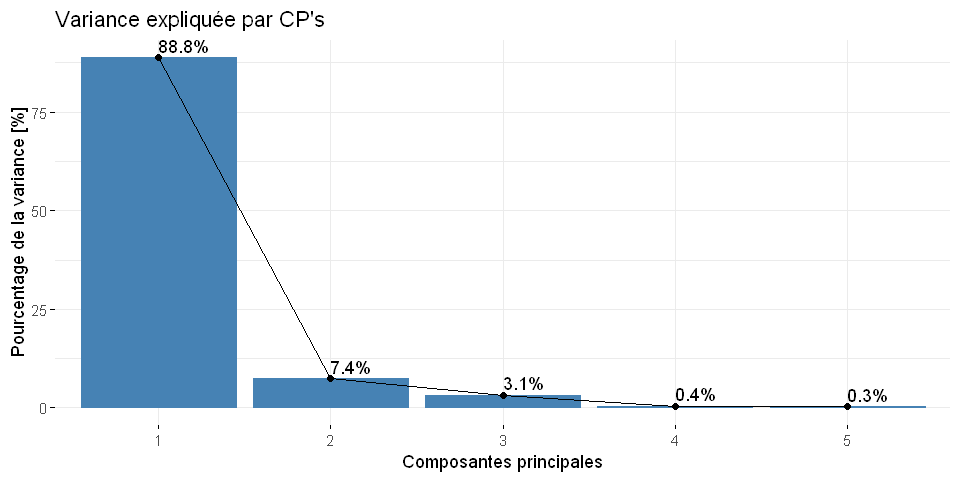

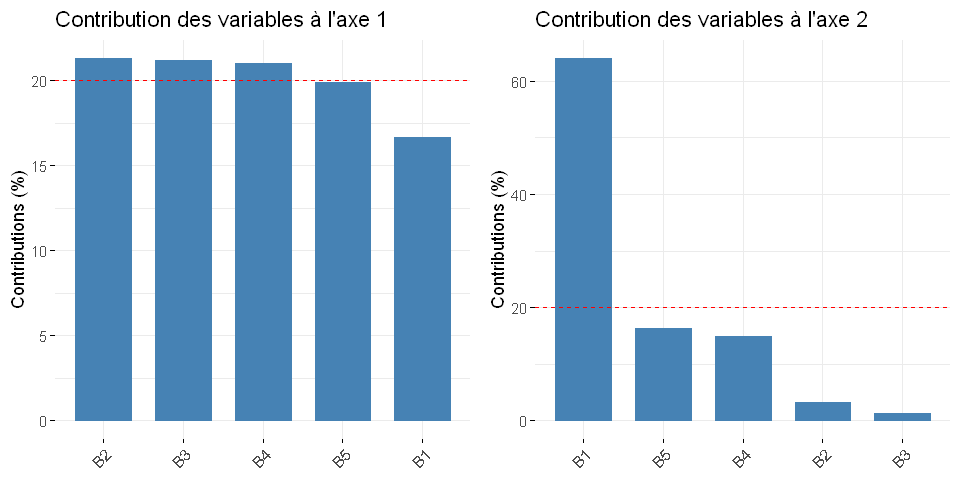

In [12]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 5, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 5, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, ncol=2)

In [13]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=5):
[1] 2.11 0.61 0.40 0.13 0.12

Rotation (n x k) = (5 x 5):
     PC1   PC2   PC3    PC4   PC5
B1 -0.41  0.80  0.37 -0.197  0.13
B2 -0.46  0.18 -0.46  0.711 -0.20
B3 -0.46 -0.12 -0.55 -0.667 -0.17
B4 -0.46 -0.39  0.11  0.096  0.79
B5 -0.45 -0.40  0.58  0.034 -0.54


# Stations groupées

In [14]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\i_SR.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5


In [15]:
data = subset(data, select = -c(date,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5
53.5,174.5,354.5,231.5,204.0
294.0,228.5,305.0,193.5,150.5


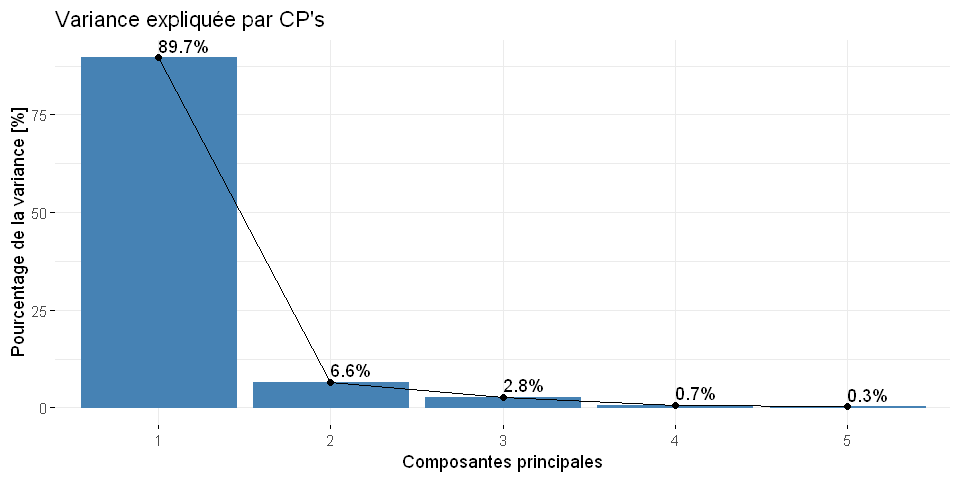

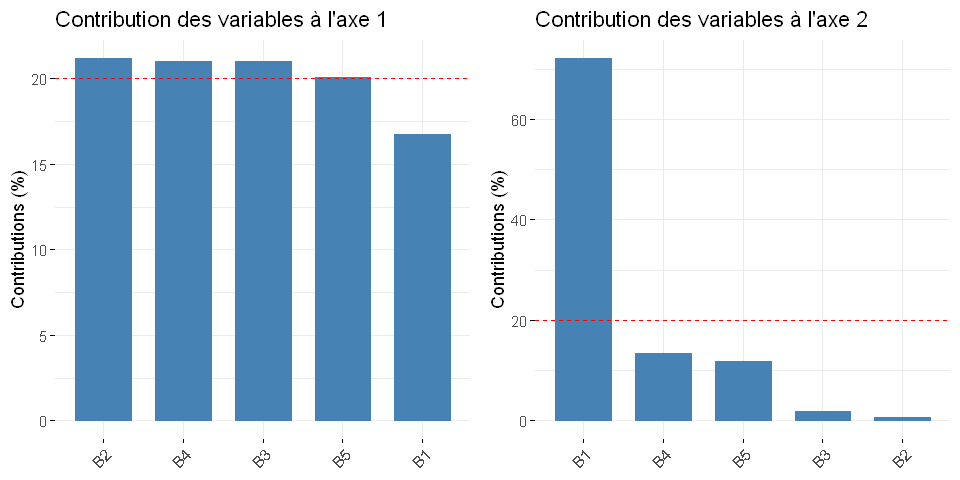

In [16]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 5, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 5, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, ncol=2)

In [17]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=5):
[1] 2.12 0.57 0.37 0.19 0.12

Rotation (n x k) = (5 x 5):
    PC1    PC2   PC3   PC4    PC5
B1 0.41  0.849 -0.27 -0.19 -0.046
B2 0.46  0.082  0.46  0.75 -0.128
B3 0.46 -0.138  0.54 -0.52  0.463
B4 0.46 -0.366 -0.13 -0.29 -0.744
B5 0.45 -0.345 -0.64  0.23  0.462


# Niveau 5 : Images et débit

# hastière

In [18]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,Débit,Précipitations
2017-04-03,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,7.188,92.46,4.6
2017-05-26,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,2.969,31.33,0.0


In [19]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,log.Débit
53.5,174.5,354.5,231.5,204.0,1.965954
294.0,228.5,305.0,193.5,150.5,1.495960


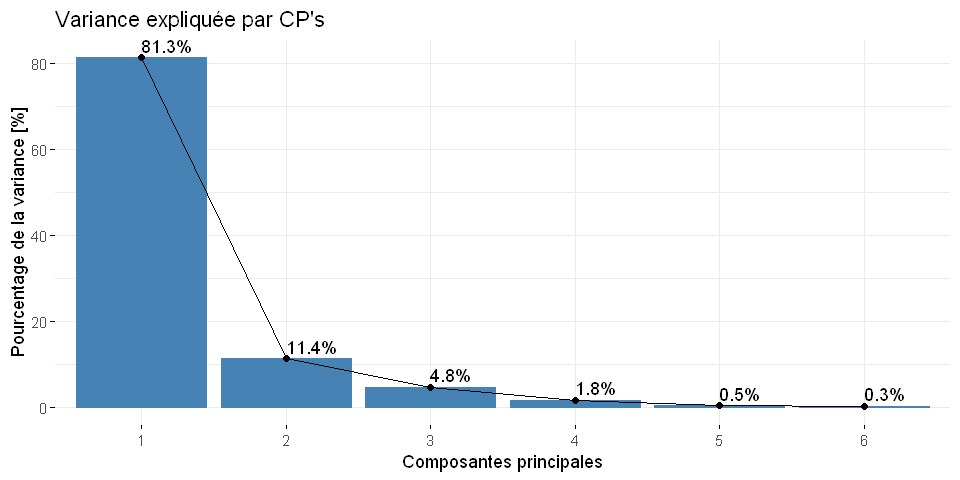

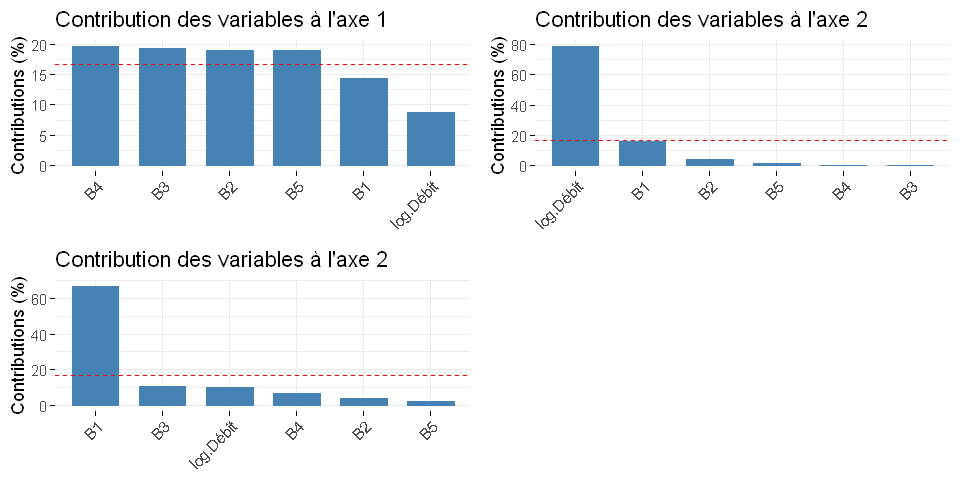

In [21]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 6, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 6, title = "Contribution des variables à l'axe 2")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 6, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, plot4, ncol=2)

In [22]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=6):
[1] 2.21 0.83 0.54 0.33 0.17 0.14

Rotation (n x k) = (6 x 6):
           PC1     PC2   PC3    PC4   PC5    PC6
B1        0.38  0.3992 -0.82  0.054  0.16 -0.038
B2        0.44  0.1991  0.19  0.466 -0.62  0.368
B3        0.44 -0.0076  0.32  0.421  0.35 -0.634
B4        0.44 -0.0357  0.26 -0.227  0.57  0.601
B5        0.43  0.1036  0.15 -0.741 -0.36 -0.315
log.Débit 0.30 -0.8882 -0.32  0.048 -0.13  0.010


# Andenne

In [23]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,Débit,Précipitations
2017-04-03,277.75,315.75,387.5,235.25,204.75,154.5,137.75,157.75,137.25,539.5,150.25,109.75,4.850,129.71,3.9
2017-05-06,79.50,116.00,116.5,13.00,1.00,1.0,1.00,1.00,1.00,111.5,62.50,82.50,5.088,73.83,9.8


In [24]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(MOY,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,log.Débit
277.75,315.75,387.5,235.25,204.75,2.112973
79.50,116.00,116.5,13.00,1.00,1.868233


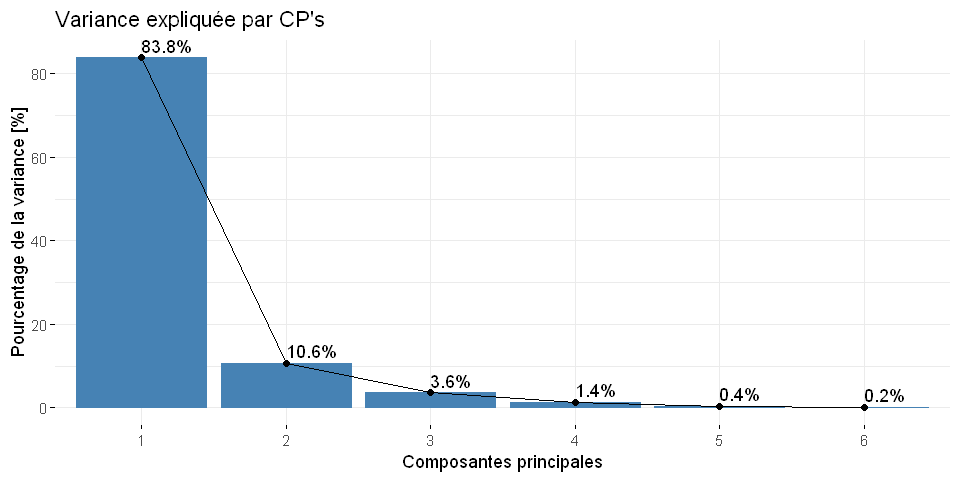

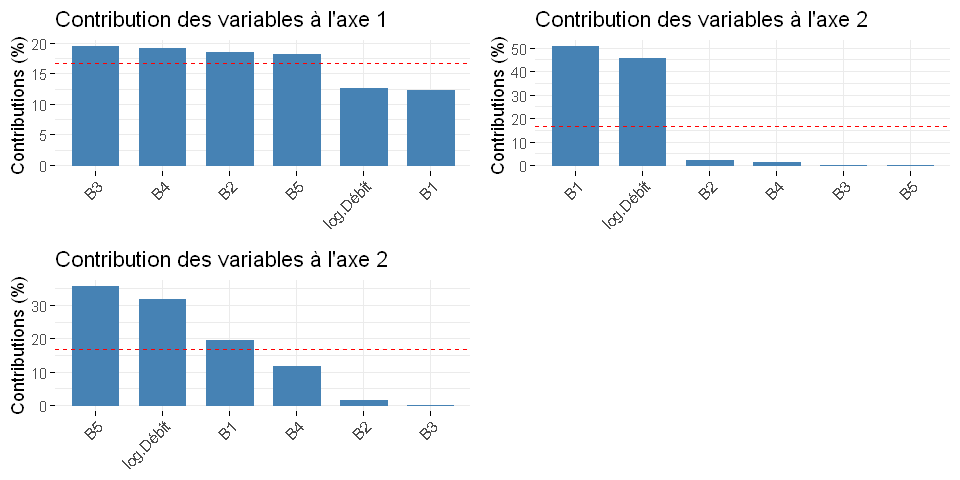

In [25]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 6, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 6, title = "Contribution des variables à l'axe 2")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 6, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, plot4, ncol=2)

In [26]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=6):
[1] 2.243 0.799 0.466 0.287 0.149 0.099

Rotation (n x k) = (6 x 6):
            PC1    PC2     PC3   PC4    PC5     PC6
B1        -0.35  0.713  0.4400  0.42  0.039 -0.0073
B2        -0.43  0.148  0.1187 -0.78  0.397 -0.1223
B3        -0.44 -0.042 -0.0016 -0.22 -0.767  0.4079
B4        -0.44 -0.107 -0.3437  0.18 -0.208 -0.7765
B5        -0.43 -0.020 -0.5981  0.28  0.413  0.4618
log.Débit -0.35 -0.676  0.5626  0.25  0.196  0.0492


# Lixhe

In [27]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit,Précipitations
2017-04-26,0.681,208,265,281,174,132,66,73,78,66,1,114,112,53.89304,4.0
2017-05-06,0.856,368,395,358,300,318,361,346,536,366,533,326,260,55.47750,18.6


In [28]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,log.Débit
208,265,281,174,132,1.731533
368,395,358,300,318,1.744117


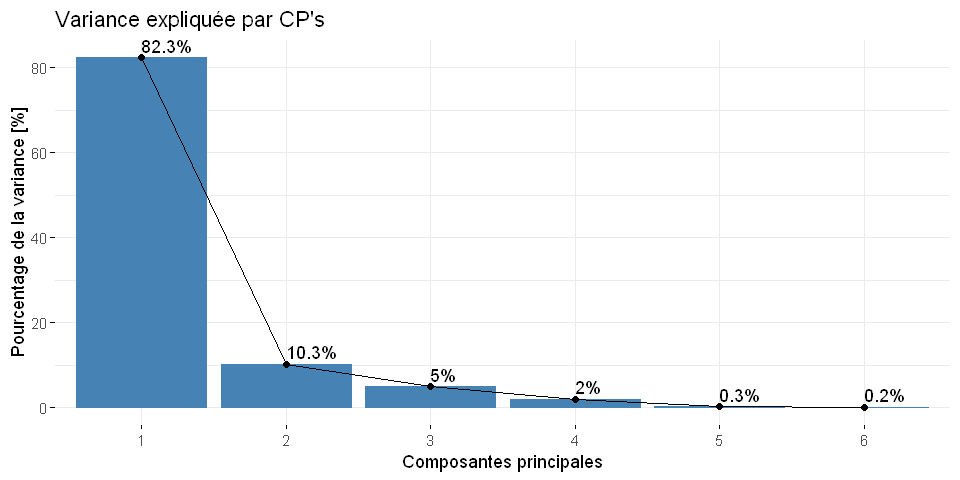

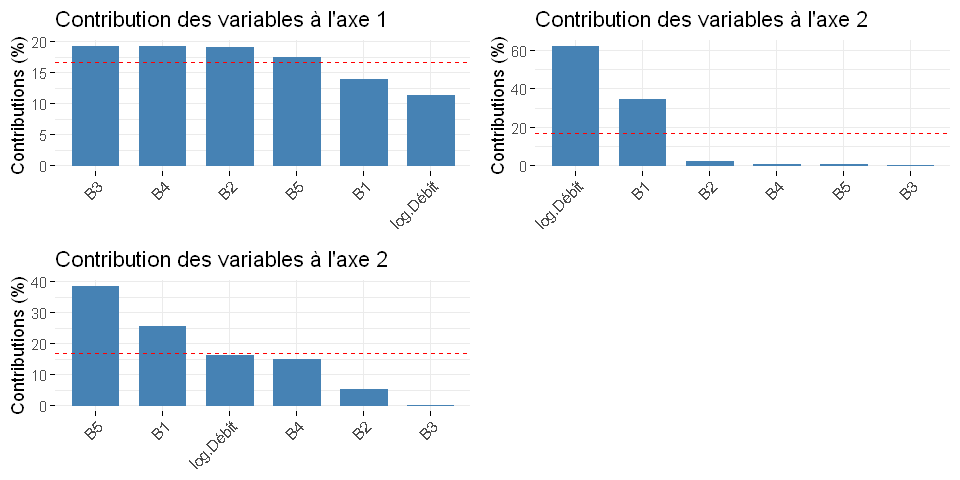

In [29]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 6, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 6, title = "Contribution des variables à l'axe 2")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 6, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, plot4, ncol=2)

In [30]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=6):
[1] 2.22 0.79 0.54 0.34 0.13 0.10

Rotation (n x k) = (6 x 6):
            PC1    PC2    PC3    PC4     PC5    PC6
B1        -0.37  0.587  0.504  0.468  0.1910 -0.084
B2        -0.44  0.148  0.228 -0.457 -0.7028  0.183
B3        -0.44 -0.028  0.013 -0.587  0.6743  0.085
B4        -0.44 -0.077 -0.384  0.067 -0.1212 -0.798
B5        -0.42  0.066 -0.621  0.358 -0.0164  0.554
log.Débit -0.34 -0.789  0.402  0.307 -0.0028  0.093


# Trois stations

In [31]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit,Précipitations
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,92.46,4.6
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,31.33,0.0


In [32]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12,Précipitations))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,log.Débit
53.5,174.5,354.5,231.5,204.0,1.965954
294.0,228.5,305.0,193.5,150.5,1.495960


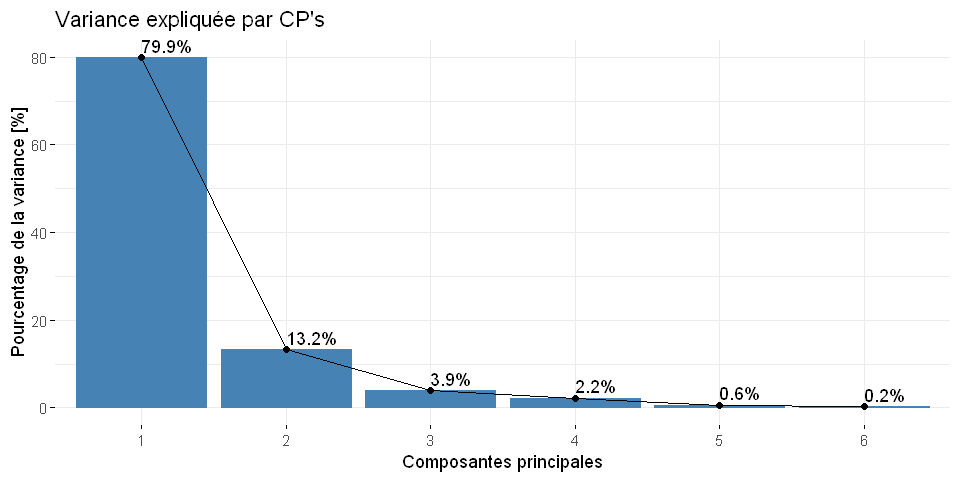

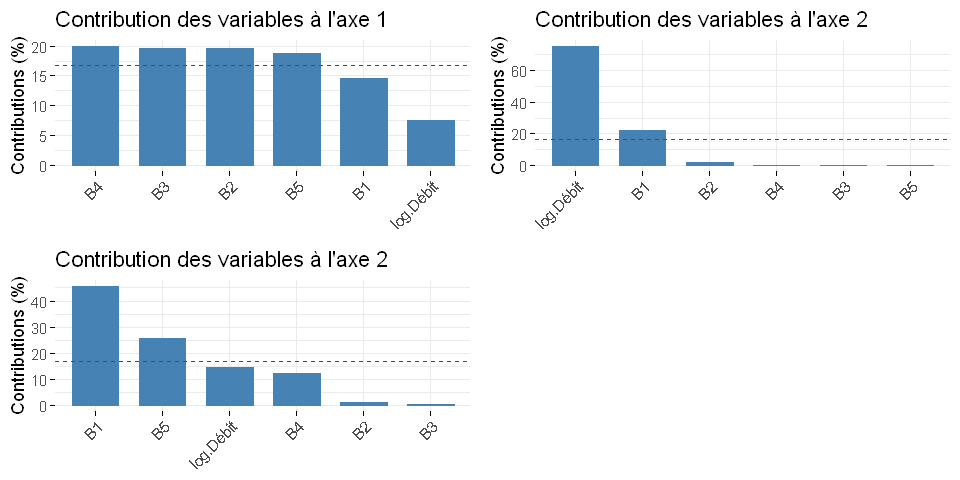

In [33]:
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 6, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 6, title = "Contribution des variables à l'axe 2")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 6, title = "Contribution des variables à l'axe 2")
grid.arrange(plot2, plot3, plot4, ncol=2)

In [34]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=6):
[1] 2.19 0.89 0.48 0.36 0.18 0.12

Rotation (n x k) = (6 x 6):
           PC1    PC2    PC3    PC4    PC5    PC6
B1        0.38  0.471 -0.676  0.383  0.169 -0.018
B2        0.44  0.130 -0.104 -0.459 -0.744 -0.112
B3        0.44  0.033  0.076 -0.569  0.547  0.418
B4        0.45 -0.058  0.349  0.086  0.271 -0.771
B5        0.43  0.032  0.508  0.542 -0.213  0.463
log.Débit 0.28 -0.869 -0.384  0.132 -0.025  0.058


# Images, débit et précipitations

# Hastière

In [35]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 1, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,Débit,Précipitations
2017-04-03,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,7.188,92.46,4.6
2017-05-26,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,2.969,31.33,0.0


In [36]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,Précipitations,log.Débit
53.5,174.5,354.5,231.5,204.0,4.6,1.965954
294.0,228.5,305.0,193.5,150.5,0.0,1.495960


      eigenvalue variance.percent cumulative.variance.percent
Dim.1     4.8774           69.678                        69.7
Dim.2     1.1390           16.272                        85.9
Dim.3     0.5464            7.806                        93.8
Dim.4     0.2842            4.060                        97.8
Dim.5     0.1058            1.511                        99.3
Dim.6     0.0284            0.406                        99.7
Dim.7     0.0186            0.266                       100.0


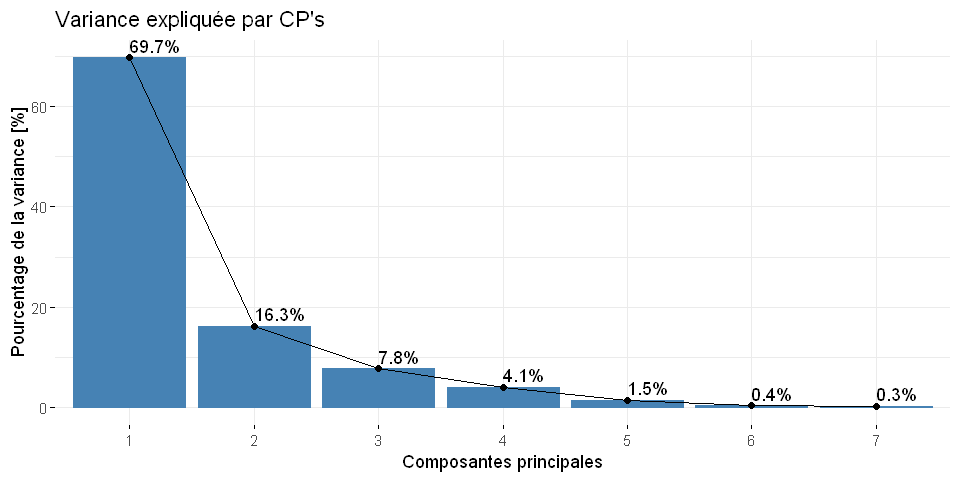

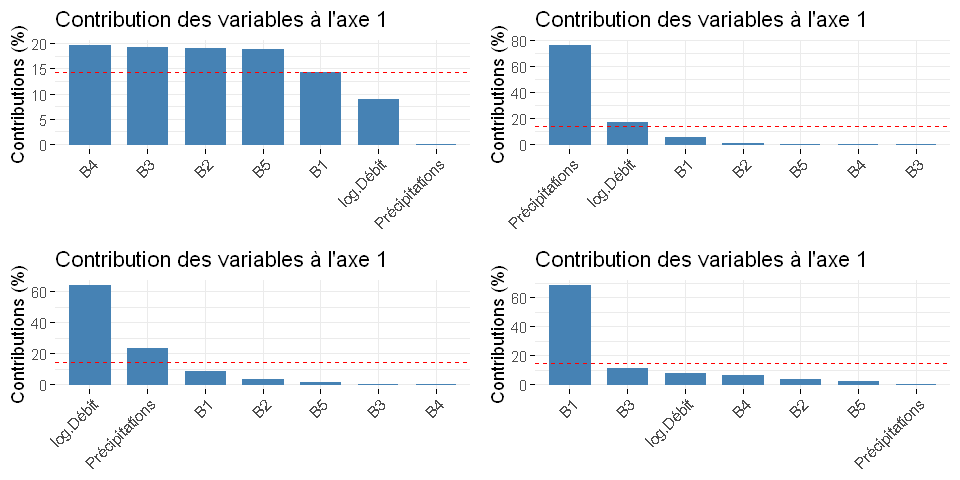

In [41]:
eig.val <- get_eigenvalue(res.pca)
print(eig.val, scientific = FALSE, digits = 3)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 7, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 7, title = "Contribution des variables à l'axe 1")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 7, title = "Contribution des variables à l'axe 1")
plot5 <- fviz_contrib(res.pca, choice = "var", axes = 4, top = 7, title = "Contribution des variables à l'axe 1")
grid.arrange(plot2,plot3, plot4, plot5, ncol=2)

In [42]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=7):
[1] 2.21 1.07 0.74 0.53 0.33 0.17 0.14

Rotation (n x k) = (7 x 7):
                  PC1     PC2     PC3    PC4    PC5      PC6    PC7
B1              0.378  0.2319 -0.2906 -0.830  0.063  0.15849  0.043
B2              0.435  0.1030 -0.1759  0.188  0.469 -0.61714 -0.365
B3              0.439  0.0099  0.0096  0.330  0.416  0.34953  0.635
B4              0.444 -0.0290  0.0046  0.253 -0.226  0.56894 -0.603
B5              0.435  0.0441 -0.1090  0.139 -0.742 -0.36055  0.312
Précipitations -0.024  0.8740  0.4801  0.062 -0.029  0.00048 -0.018
log.Débit       0.298 -0.4108  0.8013 -0.283  0.038 -0.13476 -0.015


# Andenne

In [43]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 2, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

MOY,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Turbidité,Débit,Précipitations
2017-04-03,277.75,315.75,387.5,235.25,204.75,154.5,137.75,157.75,137.25,539.5,150.25,109.75,4.850,129.71,3.9
2017-05-06,79.50,116.00,116.5,13.00,1.00,1.0,1.00,1.00,1.00,111.5,62.50,82.50,5.088,73.83,9.8


In [44]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(MOY,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,Précipitations,log.Débit
277.75,315.75,387.5,235.25,204.75,3.9,2.112973
79.50,116.00,116.5,13.00,1.00,9.8,1.868233


      eigenvalue variance.percent cumulative.variance.percent
Dim.1    5.03645           71.949                        71.9
Dim.2    1.19048           17.007                        89.0
Dim.3    0.49741            7.106                        96.1
Dim.4    0.16512            2.359                        98.4
Dim.5    0.07879            1.126                        99.5
Dim.6    0.02232            0.319                        99.9
Dim.7    0.00942            0.135                       100.0


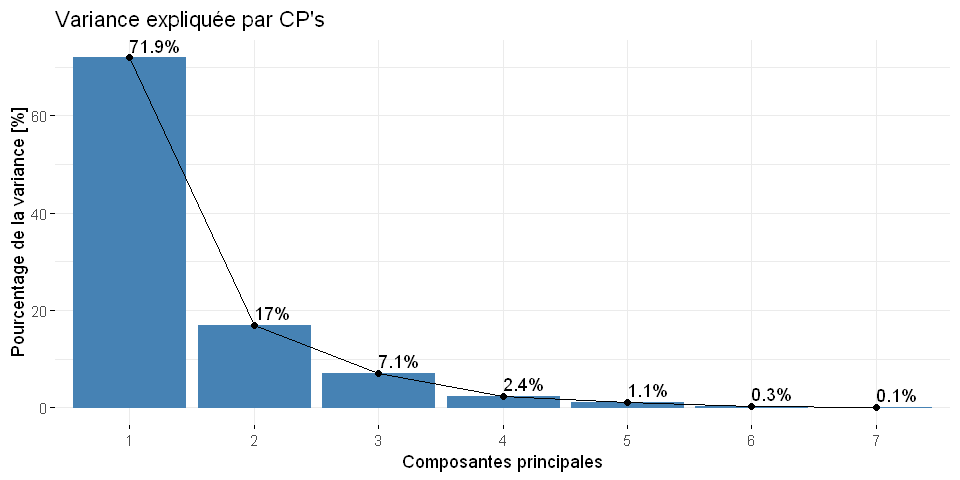

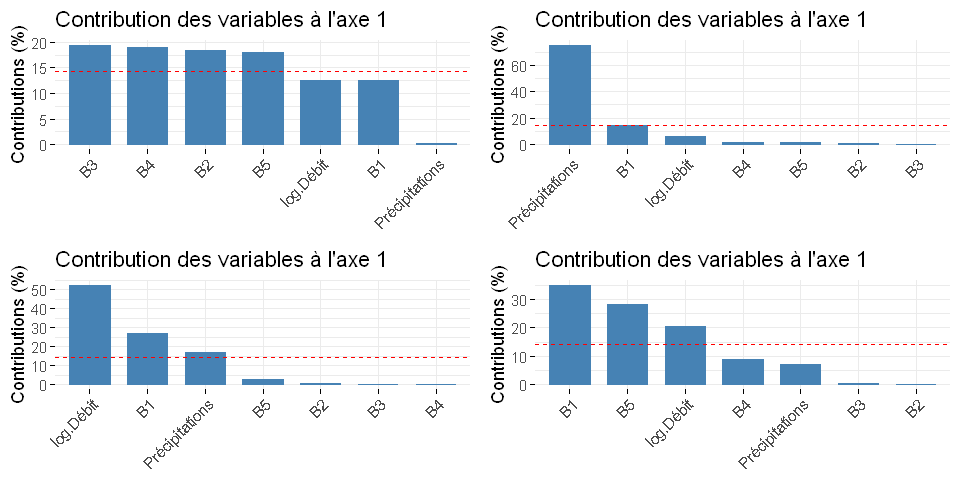

In [45]:
eig.val <- get_eigenvalue(res.pca)
print(eig.val, scientific = FALSE, digits = 3)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 7, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 7, title = "Contribution des variables à l'axe 1")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 7, title = "Contribution des variables à l'axe 1")
plot5 <- fviz_contrib(res.pca, choice = "var", axes = 4, top = 7, title = "Contribution des variables à l'axe 1")
grid.arrange(plot2,plot3, plot4, plot5, ncol=2)

In [46]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=7):
[1] 2.244 1.091 0.705 0.406 0.281 0.149 0.097

Rotation (n x k) = (7 x 7):
                  PC1    PC2    PC3    PC4    PC5    PC6     PC7
B1             -0.353  0.379  0.521 -0.592 -0.331  0.036 -0.0032
B2             -0.430  0.096  0.072 -0.040  0.796  0.392  0.1109
B3             -0.441 -0.023 -0.046  0.049  0.206 -0.765 -0.4152
B4             -0.435 -0.137  0.025  0.295 -0.212 -0.210  0.7844
B5             -0.424 -0.131  0.161  0.532 -0.346  0.421 -0.4440
Précipitations  0.042 -0.867  0.413 -0.263  0.083 -0.006 -0.0215
log.Débit      -0.354 -0.244 -0.724 -0.454 -0.209  0.196 -0.0490


# Lixhe

In [47]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 3, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit,Précipitations
2017-04-26,0.681,208,265,281,174,132,66,73,78,66,1,114,112,53.89304,4.0
2017-05-06,0.856,368,395,358,300,318,361,346,536,366,533,326,260,55.47750,18.6


In [48]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,Précipitations,log.Débit
208,265,281,174,132,4.0,1.731533
368,395,358,300,318,18.6,1.744117


      eigenvalue variance.percent cumulative.variance.percent
Dim.1    5.01021           71.574                        71.6
Dim.2    0.93974           13.425                        85.0
Dim.3    0.61654            8.808                        93.8
Dim.4    0.29379            4.197                        98.0
Dim.5    0.11511            1.644                        99.6
Dim.6    0.01536            0.219                        99.9
Dim.7    0.00925            0.132                       100.0


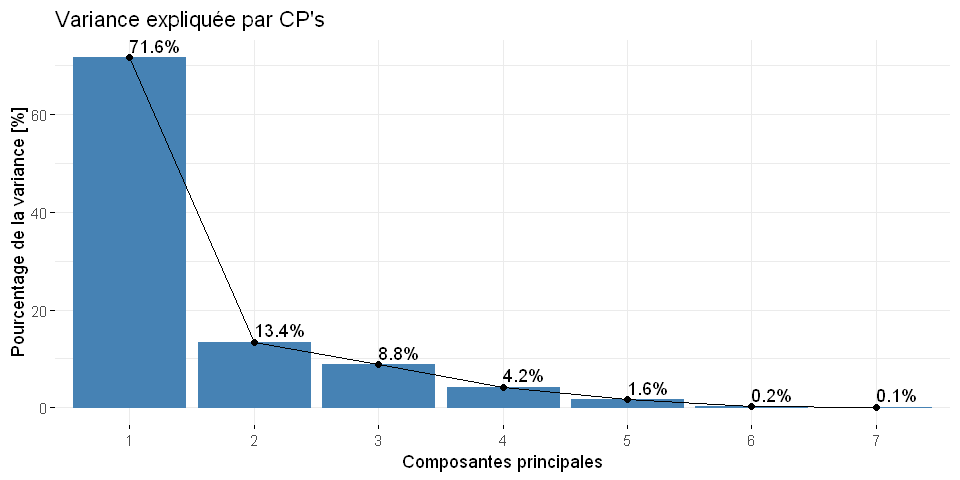

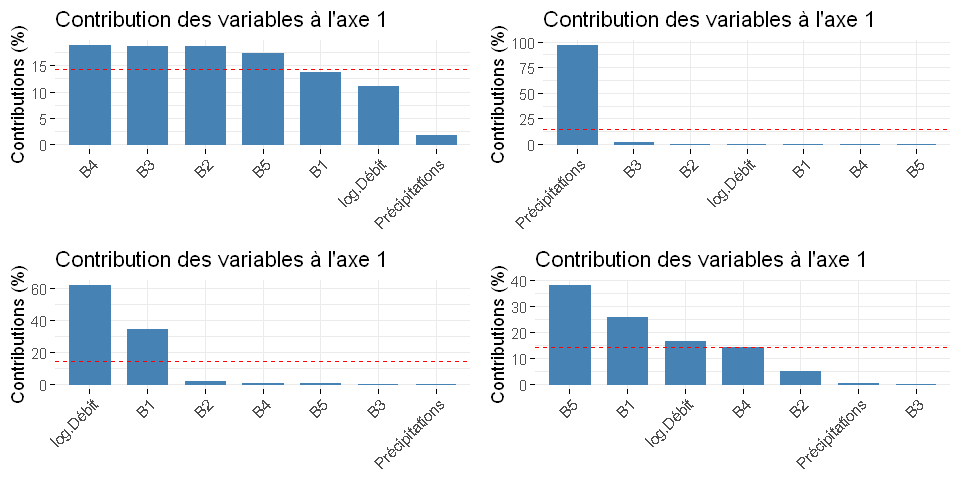

In [49]:
eig.val <- get_eigenvalue(res.pca)
print(eig.val, scientific = FALSE, digits = 3)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 7, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 7, title = "Contribution des variables à l'axe 1")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 7, title = "Contribution des variables à l'axe 1")
plot5 <- fviz_contrib(res.pca, choice = "var", axes = 4, top = 7, title = "Contribution des variables à l'axe 1")
grid.arrange(plot2,plot3, plot4, plot5, ncol=2)

In [50]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=7):
[1] 2.238 0.969 0.785 0.542 0.339 0.124 0.096

Rotation (n x k) = (7 x 7):
                 PC1     PC2    PC3    PC4    PC5    PC6    PC7
B1             -0.37  0.0505  0.588 -0.507  0.466  0.198 -0.032
B2             -0.43  0.0713  0.149 -0.221 -0.476 -0.714 -0.030
B3             -0.43  0.1373 -0.025  0.013 -0.558  0.625  0.301
B4             -0.43 -0.0069 -0.078  0.377  0.056  0.126 -0.802
B5             -0.42  0.0036  0.065  0.618  0.381 -0.201  0.505
Précipitations -0.13 -0.9843 -0.016 -0.069 -0.066  0.042  0.051
log.Débit      -0.33  0.0683 -0.788 -0.405  0.303 -0.037  0.081


# Trois stations

In [51]:
library(readxl)
data <- read_excel(
    path = "Desktop\\Memoire\\bases_de_donnees\\jeux_donnees\\vi_SR_débit_précip.xlsx",
    sheet = 4, # 1 = hastière, 2 = andenne, 3 = lixhe, 4 = tout
    col_names = TRUE)
head(data,2)

date,Turbidité,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,Débit,Précipitations
2017-04-03,7.188,53.5,174.5,354.5,231.5,204.0,110.5,125.5,132.0,129,103,144.5,101.0,92.46,4.6
2017-05-26,2.969,294.0,228.5,305.0,193.5,150.5,37.0,51.5,54.5,71,190,224.0,182.5,31.33,0.0


In [52]:
data$log.Débit <- log10(data$Débit)
data = subset(data, select = -c(date,Débit,Turbidité,B6,B7,B8,B8A,B9,B11,B12))
res.pca <- prcomp(data, scale = TRUE)
head(data,2)

B1,B2,B3,B4,B5,Précipitations,log.Débit
53.5,174.5,354.5,231.5,204.0,4.6,1.965954
294.0,228.5,305.0,193.5,150.5,0.0,1.495960


      eigenvalue variance.percent cumulative.variance.percent
Dim.1      4.798           68.549                        68.5
Dim.2      1.014           14.490                        83.0
Dim.3      0.778           11.113                        94.2
Dim.4      0.232            3.312                        97.5
Dim.5      0.131            1.864                        99.3
Dim.6      0.034            0.485                        99.8
Dim.7      0.013            0.186                       100.0


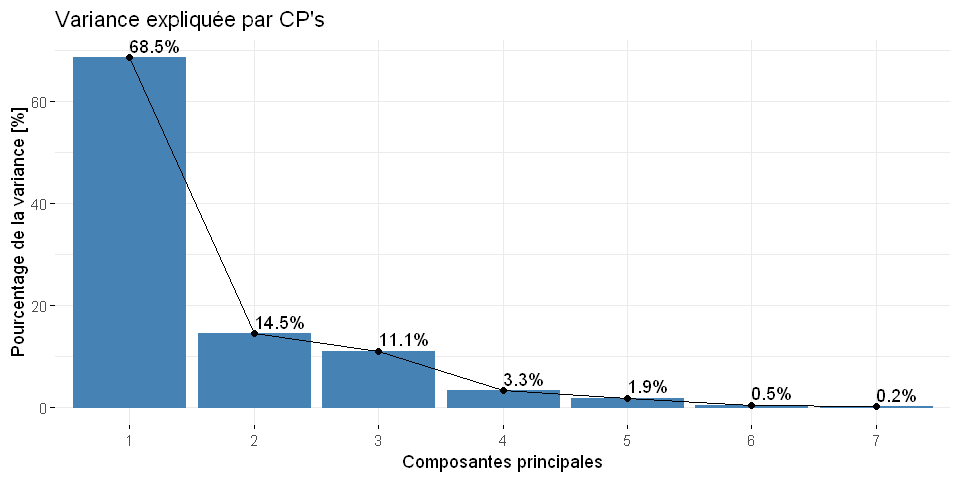

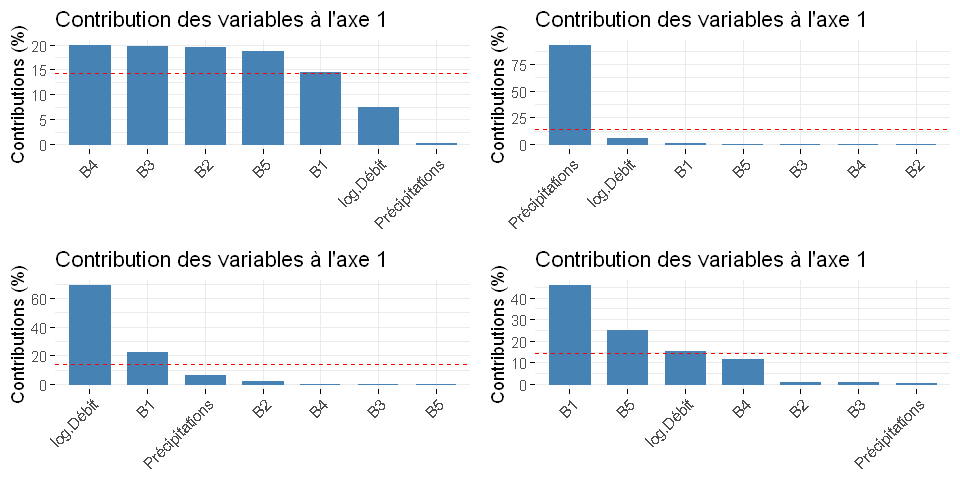

In [53]:
eig.val <- get_eigenvalue(res.pca)
print(eig.val, scientific = FALSE, digits = 3)
fviz_eig(res.pca, addlabels = TRUE, main = "Variance expliquée par CP's",
        xlab = "Composantes principales",
        ylab = "Pourcentage de la variance [%]",
        col ="steelblue")
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)
plot2 <- fviz_contrib(res.pca, choice = "var", axes = 1, top = 7, title = "Contribution des variables à l'axe 1")
plot3 <- fviz_contrib(res.pca, choice = "var", axes = 2, top = 7, title = "Contribution des variables à l'axe 1")
plot4 <- fviz_contrib(res.pca, choice = "var", axes = 3, top = 7, title = "Contribution des variables à l'axe 1")
plot5 <- fviz_contrib(res.pca, choice = "var", axes = 4, top = 7, title = "Contribution des variables à l'axe 1")
grid.arrange(plot2,plot3, plot4, plot5, ncol=2)

In [54]:
print(res.pca, digits = 2)

Standard deviations (1, .., p=7):
[1] 2.19 1.01 0.88 0.48 0.36 0.18 0.11

Rotation (n x k) = (7 x 7):
                 PC1     PC2    PC3    PC4    PC5     PC6    PC7
B1             0.381  0.0797 -0.469  0.678 -0.374  0.1690  0.018
B2             0.442  0.0002 -0.136  0.095  0.461 -0.7432  0.112
B3             0.443 -0.0305 -0.044 -0.090  0.563  0.5461 -0.421
B4             0.447  0.0048  0.065 -0.343 -0.087  0.2722  0.772
B5             0.432  0.0327 -0.020 -0.500 -0.553 -0.2150 -0.458
Précipitations 0.036  0.9646  0.251  0.060  0.036  0.0031 -0.018
log.Débit      0.275 -0.2472  0.832  0.390 -0.124 -0.0245 -0.059
